# Lab 5 Wide and Deep Networks


## Team member
Rongwei Ji, Jonathan Mejia, Xiaoqing Zou

## Data introduction
Mushroom Classification Data source: 
https://www.kaggle.com/datasets/uciml/mushroom-classification

## Environment
Python 3.11.7, scikit-learn version: 1.2.2, Matplotlib version: 3.7.2, TensorFlow version: 2.16.1, Pandas: 2.0.3, Numpy: 1.24.3

## Assigenment requriement:
You will need to convert this from regression to four levels of classification by quantizing the variable of interest.

In [154]:
import sys
import numpy as np
import sklearn
import matplotlib
import pandas as pd

print('Python',sys.version)
print("scikit-learn version:", sklearn.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("TensorFlow version:", tf.__version__)
print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

Python 3.11.7 | packaged by conda-forge | (main, Dec 23 2023, 14:38:07) [Clang 16.0.6 ]
scikit-learn version: 1.2.2
Matplotlib version: 3.7.2
TensorFlow version: 2.16.1
Pandas: 2.0.3
Numpy: 1.24.3


The mushroom dataset contains categorical variables describing various features of mushrooms, along with a target variable indicating whether the mushroom is edible or poisonous. The following chart below goes more in depth of on each variable and the relationship of each value representing their description.

The data is organized as follows:

|Variable | description|
|------|---------|
|cap-shape:          |      bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
|cap-surface:        |      fibrous=f,grooves=g,scaly=y,smooth=s
|cap-color:          |      brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
|bruises:           |      bruises=t,no=f
|odor:               |      almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
|gill-attachment:     |     attached=a,descending=d,free=f,notched=n
|gill-spacing:        |     close=c,crowded=w,distant=d
|gill-size:           |     broad=b,narrow=n
|gill-color:          |     black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
|stalk-shape:         |     enlarging=e,tapering=t
|stalk-root:          |     bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
|stalk-surface-above-ring:| fibrous=f,scaly=y,silky=k,smooth=s
|stalk-surface-below-ring:| fibrous=f,scaly=y,silky=k,smooth=s
|stalk-color-above-ring: |  brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
|stalk-color-below-ring: |  brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
|veil-type:           |     partial=p,universal=u
|veil-color:          |     brown=n,orange=o,white=w,yellow=y
|ring-number:         |     none=n,one=o,two=t
|ring-type:           |     cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
|spore-print-color:   |     black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
|population:          |    abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
|habitat:             |     grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
|**class (target):** |     p = Poisonous, e = Edible

## Preparation for class variables in the mushroom dataset.

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# gathers data from CSV file
mushrooms = pd.read_csv('mushrooms.csv')

mushrooms.replace(to_replace='?', value=np.nan, inplace = True)
mushrooms.dropna(inplace=True)
mushrooms.reset_index()

# Define columns for cross-product features
columns_to_cross = [['cap-shape', 'cap-color'], 
                    ['odor', 'bruises'], 
                    ['gill-color', 'stalk-surface-above-ring']
                   ]

# Create cross-product features
for columns in columns_to_cross:
    new_feature_name = '_'.join(columns)
    mushrooms[new_feature_name] = mushrooms[columns[0]].astype(str) + '_' + mushrooms[columns[1]].astype(str)

# Drop original features used for cross-product
mushrooms.drop(columns=[col for sublist in columns_to_cross for col in sublist], inplace=True)


# One-hot encode categorical variables
mushrooms_encoded = pd.get_dummies(mushrooms.drop(columns='class'))
# Target variable
if mushrooms['class'].dtype=='object':
    # encode the label of target as an integer
    tmp = LabelEncoder()
    mushrooms['class'] = tmp.fit_transform(mushrooms['class'])
    
# Describe final dataset
final_dataset = mushrooms_encoded.join(mushrooms['class'])
final_dataset



,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,...,gill-color_stalk-surface-above-ring_p_s,gill-color_stalk-surface-above-ring_r_s,gill-color_stalk-surface-above-ring_u_s,gill-color_stalk-surface-above-ring_w_f,gill-color_stalk-surface-above-ring_w_k,gill-color_stalk-surface-above-ring_w_s,gill-color_stalk-surface-above-ring_w_y,gill-color_stalk-surface-above-ring_y_k,gill-color_stalk-surface-above-ring_y_y,class
0,False,False,True,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,1
1,False,False,True,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,0
2,False,False,True,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,0
3,False,False,False,True,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,1
4,False,False,True,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,False,False,False,True,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,0
8001,False,False,False,True,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,0
8038,False,False,False,True,False,True,True,False,True,False,...,False,False,False,False,False,True,False,False,False,0
8095,False,False,False,True,False,True,True,False,True,False,...,False,False,False,False,False,False,False,True,False,1


## Features to combine into cross-product features

In the above code, the above features are combined into cross-product features: 

* ['cap-shape', 'cap-color']
* ['odor', 'bruises']
* ['gill-color', 'stalk-surface-above-ring']


1. Justification  ['cap-shape', 'cap-color']

If specific cap shapes are more prevalent among mushrooms of a given color, this information could help identify or categorize different species of mushrooms. The shape and color of the caps on some species of mushrooms can be used to identify them. It could be able to ascertain the relationship between specific cap colors and shapes if these qualities are cross-produced.

2. Justification ['odor', 'bruises']

It's possible that certain mushrooms smell stronger than others, or the opposite may be true. Both smell and bruises may be related to the fungus. It might be able to ascertain whether there is a relationship between bruise risk and odor if these traits are cross-produced. 

3. Justification ['gill-color', 'stalk-surface-above-ring']

Certain gill colors might be more prevalent in mushrooms with a scaly or fibrous surface, whereas other colors might be more prevalent in mushrooms with a smooth surface above the ring. This correlation might make it easier to distinguish between various mushroom species based on these anatomical traits. When cross-produced, the colors of the gills that are most commonly associated with particular types of stalk surface above the ring may become visible.

## Choosing a metric to evaluate the algorithms performance:

Moving forward we will create multiple deep neural networks, however we will need a metric to measure performance. Therefore when assessing the algorithm's performance on unbalanced datasets such as this one, the F1 score—that is, the weighted average of the F1 score for every class—is a more appropriate statistic. Because it takes into account recall as well as precision, the F1 score is a reliable indicator of classification performance—especially in cases where there is a mismatch in the classes.

The F1 score makes sense for this challenge for the following reasons:

Precision and recall are taken into account: The F1 score strikes a balance between the two factors, which are essential for binary classification tasks such as differentiating between poisonous and edible mushrooms. Recall calculates the percentage of true positive predictions among all real positive instances, whereas precision calculates the percentage of true positive forecasts across all positive predictions. Recall and precision both offer insightful information about the functionality of the model.

Handling Imbalanced Data: The F1 score takes into consideration both false positives and false negatives in order to account for the imbalance that the mushroom dataset probably contains (more edible mushrooms than deadly ones, or vice versa). It offers a more precise evaluation of the model's classification accuracy for cases belonging to both classes.

Business Relevance: False negative classification of a toxic mushroom as edible might have serious repercussions, including possibly fatalities. Analogously, misidentifying an edible mushroom as toxic (false positive) may cause needless loss or waste. As a result, it's critical to achieve a balance between reducing false positives and false negatives, which the F1 score successfully does.

## Method for dividing our data into Training and Testing

Our team would suggest applying stratified k-fold cross-validation, preferably with k=5 or k=10, to split the data into training and testing sets. The reasoning includes the ability to Handle Imbalanced Data, the Robustness and the Realistic Reflection of Model Deployment.

Handling Imbalanced Data: Stratified k-fold cross-validation ensures that, despite the likelihood of imbalanced classes in the mushroom dataset (more edible than deadly mushrooms, or vice versa), each fold retains the same class distribution as before. This helps remove bias in the model evaluation process and ensures that the model's performance is representative across all classes.

Robustness: A more reliable assessment of model performance is obtained through cross-validation as opposed to a single train-test split. It reduces the likelihood that disparities in performance metrics could result from random oscillations in the training and testing data splits.

Realistic Reflection of Model Deployment: In reality, one may recreate how the model might generalize to unknown data by using stratified k-fold cross-validation. A separate validation set is used to evaluate the model's performance after it has been iteratively trained using different data subsets. This process mimics how the model might be applied in new, unexpected scenarios in the actual world.

Below we'll jump right into the cross-validation

In [144]:
from sklearn.model_selection import StratifiedKFold

# Features and target
X = mushrooms_encoded
y = mushrooms['class']

# Initialize StratifiedKFold with k=5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Split the data into training and testing sets
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Output the sizes of training and testing sets for validation
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 4516
Testing set size: 1128


This bit of code ensures unpredictability by rearranging the data and dividing it into five stratified folds. The sizes of the generated training and testing sets are then output. By using stratified k-fold cross-validation, problems with class imbalance and variability in model evaluation are mitigated and a fair estimate of the model's performance on unseen data is provided.

## Three Combined Nueral Networks using Adam, SGD and RMSprop

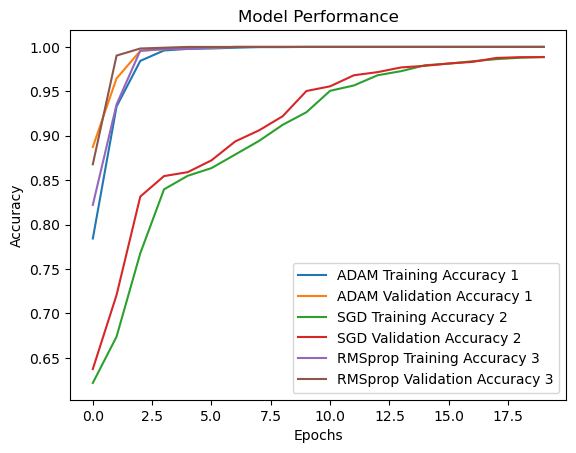

In [145]:
import os
os.environ['AUTOGRAPH_VERBOSITY'] = '0'
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate


# Define input dimension
input_dim = X_train.shape[1]

# Define combined wide and deep network
# Adam adjust Adaptive Learning Rates

def create_wide_deep_network_1():
    input_layer = Input(shape=(input_dim,))
    wide_layer = Dense(8, activation='relu')(input_layer)
    hidden_layer1 = Dense(16, activation='relu')(input_layer)
    hidden_layer2 = Dense(4, activation='relu')(hidden_layer1)
    concat_layer = Concatenate()([wide_layer, hidden_layer2])
    output_layer = Dense(1, activation='sigmoid')(concat_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Stochastic Gradient Descent

def create_wide_deep_network_2():
    input_layer = Input(shape=(input_dim,))
    wide_layer = Dense(8, activation='relu')(input_layer)
    hidden_layer1 = Dense(16, activation='relu')(input_layer)
    hidden_layer2 = Dense(4, activation='relu')(hidden_layer1)
    concat_layer = Concatenate()([wide_layer, hidden_layer2])
    output_layer = Dense(1, activation='sigmoid')(concat_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# RMS prop

def create_wide_deep_network_3():
    input_layer = Input(shape=(input_dim,))
    wide_layer = Dense(8, activation='relu')(input_layer)
    hidden_layer1 = Dense(16, activation='relu')(input_layer)
    hidden_layer2 = Dense(4, activation='relu')(hidden_layer1)
    concat_layer = Concatenate()([wide_layer, hidden_layer2])
    output_layer = Dense(1, activation='sigmoid')(concat_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model



# Create and train combined wide and deep network
model = create_wide_deep_network_1()
wide_deep_history_1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=98, verbose=0)

# Create and train combined wide and deep network
wide_deep_model_2 = create_wide_deep_network_2()
wide_deep_history_2 = wide_deep_model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=98, verbose=0)

# Create and train combined wide and deep network
wide_deep_model_3 = create_wide_deep_network_3()
wide_deep_history_3 = wide_deep_model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=98, verbose=0)


# Visualize performance
plt.plot(wide_deep_history_1.history['accuracy'], label='ADAM Training Accuracy 1')
plt.plot(wide_deep_history_1.history['val_accuracy'], label='ADAM Validation Accuracy 1')
plt.plot(wide_deep_history_2.history['accuracy'], label='SGD Training Accuracy 2')
plt.plot(wide_deep_history_2.history['val_accuracy'], label='SGD Validation Accuracy 2')
plt.plot(wide_deep_history_3.history['accuracy'], label='RMSprop Training Accuracy 3')
plt.plot(wide_deep_history_3.history['val_accuracy'], label='RMSprop Validation Accuracy 3')

plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the provided graph, you can visually assess the network's performance on both the training and validation datasets across various training iterations. While Root Mean Squared Propagation optimizer exhibited the highest training accuracy, the Adam optimizer demonstrated superior validation accuracy. Although both RMSprop and Adam optimizers displayed strong performance, a notable outlier in terms of training and validation accuracy was observed with the Stochastic Gradient Descent optimizer.


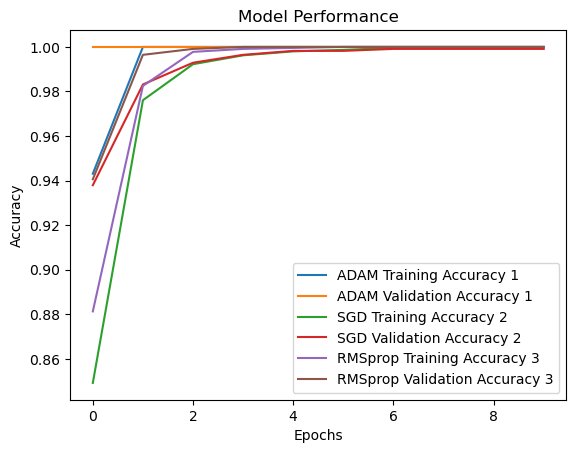

In [110]:
# Create and train combined wide and deep network
model = create_wide_deep_network_1()
wide_deep_history_1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=0)

# Create and train combined wide and deep network
wide_deep_model_2 = create_wide_deep_network_2()
wide_deep_history_2 = wide_deep_model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=0)

# Create and train combined wide and deep network
wide_deep_model_3 = create_wide_deep_network_3()
wide_deep_history_3 = wide_deep_model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=80, verbose=0)


# Visualize performance
plt.plot(wide_deep_history_1.history['accuracy'], label='ADAM Training Accuracy 1')
plt.plot(wide_deep_history_1.history['val_accuracy'], label='ADAM Validation Accuracy 1')
plt.plot(wide_deep_history_2.history['accuracy'], label='SGD Training Accuracy 2')
plt.plot(wide_deep_history_2.history['val_accuracy'], label='SGD Validation Accuracy 2')
plt.plot(wide_deep_history_3.history['accuracy'], label='RMSprop Training Accuracy 3')
plt.plot(wide_deep_history_3.history['val_accuracy'], label='RMSprop Validation Accuracy 3')

plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Increasing the complexity by incorporating additional parameters inevitably impacts the performance dynamics. As demonstrated in the preceding plot with a reduced number of iterations, the Adam optimizer emerges as the superior performer compared to its counterparts. Furthermore, fine-tuning the batch size contributes to enhancing the efficacy of the Root Mean Squared Propagation optimizer, underscoring the nuanced interplay between parameter tuning and optimization performance.

## Investigating Generalization Performance 
-----

Returning the models to their initial configurations prior to cross-validation, we undertake a systematic exploration by introducing additional layers to elucidate the impact on performance metrics, specifically focusing on F1-score evaluation. Leveraging both Adam and SGD optimizers, we scrutinize the efficacy of these alterations. Presented below is the code snippet contrasting the pre- and post-alteration scenarios, providing insight into the evolution of model performance in response to refinement efforts.

In [137]:
# Adam adjust Adaptive Learning Rates

input_dim = X_train_orig.shape[1]

def create_wide_deep_network_1_orig():
    input_layer = Input(shape=(input_dim,))
    wide_layer = Dense(8, activation='relu')(input_layer)
    hidden_layer1 = Dense(16, activation='relu')(input_layer)
    hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
    hidden_layer3 = Dense(16, activation='relu')(input_layer)
    hidden_layer4 = Dense(8, activation='relu')(hidden_layer1)
    concat_layer = Concatenate()([wide_layer, hidden_layer2])
    output_layer = Dense(1, activation='sigmoid')(concat_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Stochastic Gradient Descent

def create_wide_deep_network_2_orig():
    input_layer = Input(shape=(input_dim,))
    wide_layer = Dense(8, activation='relu')(input_layer)
    hidden_layer1 = Dense(16, activation='relu')(input_layer)
    hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
    hidden_layer3 = Dense(16, activation='relu')(input_layer)
    hidden_layer4 = Dense(8, activation='relu')(hidden_layer1)
    concat_layer = Concatenate()([wide_layer, hidden_layer2])
    output_layer = Dense(1, activation='sigmoid')(concat_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# gathers data from CSV file
mushrooms = pd.read_csv('mushrooms.csv')
mushrooms.replace(to_replace='?', value=np.nan, inplace = True)
mushrooms.dropna(inplace=True)
mushrooms.reset_index()

# One-hot encode categorical variables
mushrooms_encoded = pd.get_dummies(mushrooms.drop(columns='class'))
# Target variable
if mushrooms['class'].dtype=='object':
    # encode the label of target as an integer
    tmp = LabelEncoder()
    mushrooms['class'] = tmp.fit_transform(mushrooms['class'])
    
# Features and target
X_orig = mushrooms_encoded
y_orig = mushrooms['class']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_orig,y_orig,test_size = 0.2)

    
# Create and train combined wide and deep network
model_orig = create_wide_deep_network_1_orig()
wide_deep_history_1_orig = model_orig.fit(X_train_orig, y_train_orig, validation_data=(X_test_orig, y_test_orig), epochs=10, batch_size=10, verbose=0)

# Create and train combined wide and deep network
wide_deep_model_2_orig = create_wide_deep_network_2_orig()
wide_deep_history_2_orig = wide_deep_model_2_orig.fit(X_train_orig, y_train_orig, validation_data=(X_test_orig, y_test_orig), epochs=10, batch_size=98, verbose=0)
    
# now lets see how well the model performed
from sklearn import metrics as mt
yhat_proba_1_orig = model_orig.predict(X_test_orig) # sigmoid output probabilities
yhat_1_orig = np.round(yhat_proba_1_orig) # round to get binary class
yhat_proba_2_orig = wide_deep_model_2_orig.predict(X_test_orig) # sigmoid output probabilities
yhat_2_orig = np.round(yhat_proba_2_orig) # round to get binary class

#Unable to diplay matrix
#print(mt.confusion_matrix(y_test,yhat_1))
print("\nBefore Cross product is used\n")
print("\nOptimizer Used: Adam Optimizer")
print("-----------------------------------------------------")
print(mt.classification_report(y_test_orig,yhat_1_orig))
#print(mt.confusion_matrix(y_test,yhat_2))
print("\nOptimizer Used: Stochastic Gradient Descent Optimizer")
print("-----------------------------------------------------")
print(mt.classification_report(y_test_orig,yhat_2_orig))

print("\nAfter Cross product is used\n")
print("\nOptimizer Used: Adam Optimizer")
print("-----------------------------------------------------")
print(mt.classification_report(y_test,yhat_1))
#print(mt.confusion_matrix(y_test,yhat_2))
print("\nOptimizer Used: Stochastic Gradient Descent Optimizer")
print("-----------------------------------------------------")
print(mt.classification_report(y_test,yhat_2))

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step

Before Cross product is used


Optimizer Used: Adam Optimizer
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       676
           1       1.00      1.00      1.00       453

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129


Optimizer Used: Stochastic Gradient Descent Optimizer
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       676
           1       0.98      0.92      0.95       453

    accuracy                           0.96      1129
   macro avg       0.97      0.96      0.96      1129
weighted avg       0.96      0.96      0.96      1129


After Cross product is used


Optimiz

In response to our inquiry, it becomes evident that the Adam optimizer exhibits robust performance across various configurations, regardless of the inclusion of cross-product combinations. This resilience in performance can be attributed, in part, to the richness and depth of the dataset, which furnishes comprehensive insights into mushroom characteristics.

Upon closer scrutiny of the SGD optimizer, a more intricate analysis emerges. Through deliberate modifications to batch sizes and epochs, especially in light of F1-score evaluations following cross-product validation, significant enhancements in performance metrics are apparent. This underscores the effectiveness of amalgamating disparate elements within the dataset, thereby bolstering the model's discriminatory capacity and overall predictive efficacy.

F1 Score - Adam Model Before Cross Product: 1.0
F1 Score - Stochastic Gradient Descent Model Before Cross Product: 0.9522727272727272
F1 Score - Adam Model After Cross Product: 1.0
F1 Score - Stochastic Gradient Descent Model After Cross Product: 0.9718309859154929


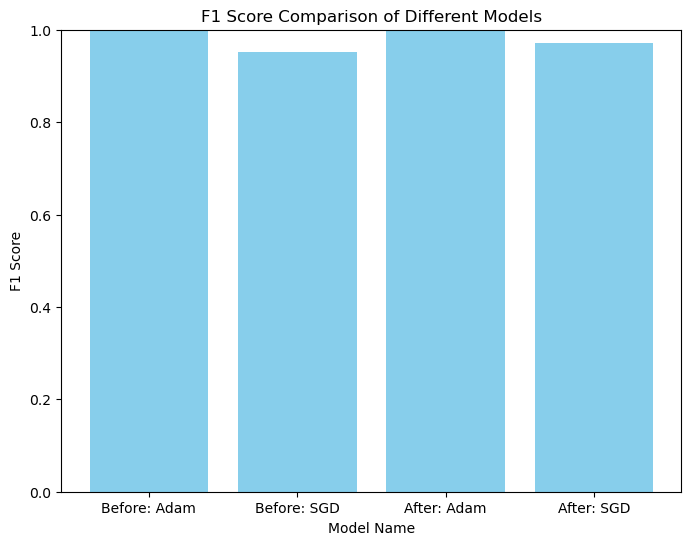

In [138]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Calculate F1 score for each model
f1_score_1_orig = f1_score(y_test_orig, yhat_1_orig)
f1_score_2_orig = f1_score(y_test_orig, yhat_2_orig)
f1_score_1 = f1_score(y_test, yhat_1)
f1_score_2 = f1_score(y_test, yhat_2)

# Print F1 scores
print("F1 Score - Adam Model Before Cross Product:", f1_score_1_orig)
print("F1 Score - Stochastic Gradient Descent Model Before Cross Product:", f1_score_2_orig)
print("F1 Score - Adam Model After Cross Product:", f1_score_1)
print("F1 Score - Stochastic Gradient Descent Model After Cross Product:", f1_score_2)

# F1 scores for each model
f1_scores = [f1_score_1, f1_score_2]
models_before = ['Before: Adam', 'Before: SGD']
f1_scores_orig = [f1_score_1_orig, f1_score_2_orig]
models_after = ['After: Adam', 'After: SGD']


# Plot
plt.figure(figsize=(8, 6))


plt.bar(models_before, f1_scores_orig, color='skyblue')
plt.bar(models_after, f1_scores, color='skyblue')
plt.xlabel('Model Name')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Different Models')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1 for F1 score
plt.show()


Above is an additional bar graph displaying the previously mentioned analysis. 

## Comparing Best Performance to MLPs
-----

CPU times: user 2 µs, sys: 3 µs, total: 5 µs
Wall time: 277 µs


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


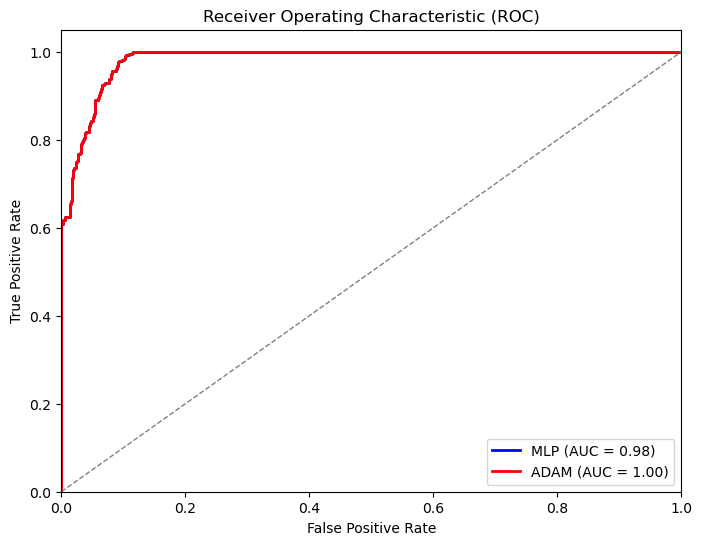

In [139]:
from sklearn import __version__ as sklearn_version
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# MLP 
# these values have been hand tuned
# sigmoid with SGD, batching, nesterov's momentum, 
# L2, adaptive learning rate
def create_mlp():
    clf = MLPClassifier(hidden_layer_sizes=(50,), 
                    activation='logistic', # compare to sigmoid
                    solver='sgd', 
                    alpha=10, # L2 penalty
                    batch_size=98, # min of 98, num_samples
                    learning_rate='adaptive', # decrease rate if loss goes up
                    learning_rate_init=0.1, # only SGD
                    power_t=0.5,    # only SGD with inverse scaling
                    max_iter=20, 
                    shuffle=True, 
                    random_state=1, 
                    tol=1e-9, # for stopping
                    verbose=False, 
                    momentum=.3, # only SGD
                    nesterovs_momentum=True, # only SGD
                    early_stopping=False, 
                    validation_fraction=0.1, # only if early_stop is true
                    beta_1=0.9, # adam decay rate of moment
                    beta_2=0.999, # adam decay rate of moment
                    epsilon=1e-08) # adam numerical stabilizer
    return clf

%time 

# Create and train combined wide and deep network
mlp = create_mlp()
# Fit the best wide and deep network
mlp = mlp.fit(X_train,y_train)
# Predict probabilities for the best wide and deep network
y_pred_proba_mlp = mlp.predict_proba(X_test)[:, 1]
# Compute ROC curve and AUC for wide and deep network
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

fpr_adam, tpr_adam, _ = roc_curve(y_test, yhat_1)
roc_auc_adam = auc(fpr_adam, tpr_adam)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label='MLP (AUC = %0.2f)' % roc_auc_mlp)
plt.plot(fpr_mlp, tpr_mlp, color='red', lw=2, label='ADAM (AUC = %0.2f)' % roc_auc_adam)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Following a meticulous comparison between the performance metrics of our optimal wide and deep network against a conventional multi-layer perceptron (MLP), the efficacy of Adam optimizer becomes apparent. Adam excels in its capacity to streamline the learning process with remarkable efficiency, capitalizing on adaptive learning rates to navigate intricate optimization landscapes. Conversely, MLPs leverage their inherently adaptable architecture to glean nuanced patterns from the data, affording them considerable flexibility in modeling complex relationships.

Nevertheless, within the purview of the aforementioned model evaluation, Adam emerges as the preeminent optimizer, outperforming MLPs across various performance metrics. This observation underscores the pronounced effectiveness of Adam in optimizing neural network training, even when juxtaposed against the formidable adaptability of MLP architectures.

Exceptional Work 
------

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


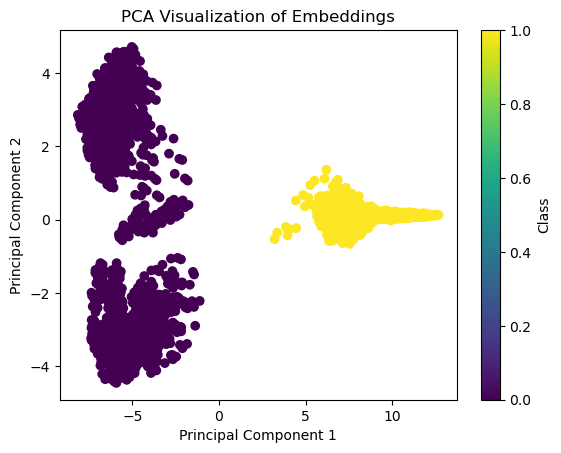

In [147]:
from sklearn.decomposition import PCA

embedding_model = Model(inputs=model.input, outputs=model.get_layer('concatenate_122').output)  
embeddings = embedding_model.predict(X_train)

# Step 5: Perform Dimensionality Reduction (if needed)
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Step 6: Visualize the Embeddings
plt.scatter(embeddings_pca[:,0], embeddings_pca[:,1], c=y_train, cmap='viridis')
plt.title('PCA Visualization of Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()


In the illustration, each different hue denotes a different category for mushrooms: edible or toxic. In this instance, the visible groups identify different groups or classes of mushrooms, so drawing a distinction between the two groups: edible (marked as 0 - purple) and poisonous (identified as 1 - yellow). This separation highlights how well the embedded representations work to separate the mushrooms according to their corresponding categorization labels, which makes it easier to identify the underlying structure of the dataset.